In [150]:
import sklearn as sk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime

In [151]:
df=pd.read_csv("aac_shelter_outcomes.csv")

In [152]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [153]:
df.animal_type.unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

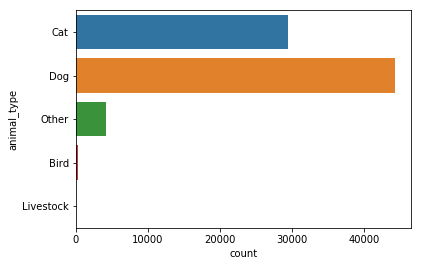

In [154]:
sns.countplot(y=df["animal_type"])

In [155]:
data=df[df["animal_type"]=="Cat"]
data=data.append(df[df["animal_type"]=="Dog"])
data.animal_type.unique()

array(['Cat', 'Dog'], dtype=object)

In [156]:
data.shape

(73664, 12)

In [157]:
data.keys()

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [158]:
data=data.drop(["animal_id","name","outcome_subtype","date_of_birth"],axis=1)
#cat=data[data["animal_type"]=="Cat"]
#dog=data[data["animal_type"]=="Dog"]

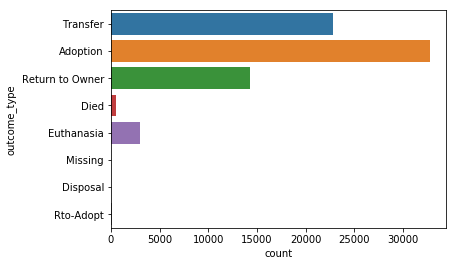

In [159]:
sns.countplot(y=data["outcome_type"])

In [160]:
print(data[data.isnull().any(axis=1)].shape)
data=data.dropna(axis=0, how='any')

(12, 8)


In [161]:
data.shape

(73652, 8)

In [162]:
def conv_age(a):
    age=int("".join(list(filter(str.isdigit, a))))
    if(a.find("month")):
        return age*30
    if(a.find("week")):
        return age*7
    if(a.find("day")):
        return age
    if(a.find("year")):
        return age*365
    return 0

In [163]:
data["age_in_days"]=data["age_upon_outcome"].apply(conv_age)

In [164]:
data.age_in_days.shape

(73652,)

In [165]:
data[data.breed=="Domestic Shorthair Mix"].shape

(23331, 9)

In [166]:
def get_day(x):
    return int(datetime.datetime.strptime(x[:10], '%Y-%m-%d').strftime('%w'))
data["day"]=data["datetime"].apply(get_day)

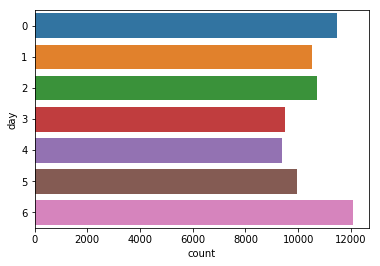

In [167]:
sns.countplot(y=data["day"])

In [168]:
def get_hr(x):
    return int(x[11:13])
data["hour"]=data["datetime"].apply(get_hr)    

In [169]:
data.head()

,age_upon_outcome,animal_type,breed,color,datetime,monthyear,outcome_type,sex_upon_outcome,age_in_days,day,hour
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-22T16:04:00,2014-07-22T16:04:00,Transfer,Intact Male,60,2,16
8,1 month,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-08-14T18:45:00,2014-08-14T18:45:00,Adoption,Intact Female,30,4,18
9,3 months,Cat,Domestic Shorthair Mix,White/Black,2014-06-29T17:45:00,2014-06-29T17:45:00,Adoption,Spayed Female,90,0,17
10,1 year,Cat,Domestic Medium Hair Mix,Black/White,2014-03-28T14:55:00,2014-03-28T14:55:00,Return to Owner,Spayed Female,30,5,14
17,3 weeks,Cat,Domestic Shorthair Mix,Black/White,2014-01-09T19:29:00,2014-01-09T19:29:00,Transfer,Intact Male,90,4,19


In [170]:
def get_gender(x):
    if(x.find("Female")>=0):
        return "Female"
    if(x.find("Male")>=0):
        return "Male"
    
    return None
def get_ifSpayed(x):
    if(x.find("Intact")>=0):
        return "No"
    if(x.find("Spayed")>=0):
        return "Yes"
    if(x.find("Neutered")>=0):
        return "Yes"
    return None
def get_time(x):
    if(x<6):
        return "Night"
    if(x<12):
        return "Morning"
    if(x<18):
        return "Afternoon"
    if(x<20):
        return "Evening"
    return "Night"
def age(x):
    if(x<=180):
        return "Puppy"
    if(x<=720):
        return "Adolescent"
    if(x<=2920):
        return "Adult"
    return "Senior"
data["sex"]=data["sex_upon_outcome"].apply(get_gender)
data["IsSpayed"]=data["sex_upon_outcome"].apply(get_ifSpayed)        
data["Time"]=data["hour"].apply(get_time)
data["Life_stage"]=data["age_in_days"].apply(age)

In [171]:
print(data[data.isnull().any(axis=1)].shape)
data=data.dropna(axis=0, how='any')

(2764, 15)


In [172]:
for i in data["outcome_type"].unique():
    print(i,data[data["outcome_type"]==i].shape)
data=data[data["outcome_type"]!="Missing"]
data=data[data["outcome_type"]!="Rto-Adopt"]
data=data[data["outcome_type"]!="Disposal"]

Transfer (20473, 15)
Adoption (32783, 15)
Return to Owner (14247, 15)
Died (469, 15)
Euthanasia (2703, 15)
Missing (44, 15)
Rto-Adopt (150, 15)
Disposal (19, 15)


In [173]:
data_class=data.drop(["age_upon_outcome","datetime","monthyear","sex_upon_outcome","hour","breed","color","age_in_days"],axis=1)
data_class.head()
cat_c=data_class[data_class["animal_type"]=="Cat"]
dog_c=data_class[data_class["animal_type"]=="Dog"]
cat_c=cat_c.drop("animal_type",axis=1)
dog_c=dog_c.drop("animal_type",axis=1)
dog_c.head()

,outcome_type,day,sex,IsSpayed,Time,Life_stage
1,Transfer,4,Female,Yes,Morning,Puppy
2,Adoption,2,Male,Yes,Afternoon,Puppy
3,Transfer,0,Male,Yes,Afternoon,Adolescent
5,Transfer,1,Male,No,Afternoon,Puppy
7,Transfer,1,Female,Yes,Afternoon,Puppy


In [175]:
data=data.drop(["age_upon_outcome","breed","color","datetime","monthyear","sex_upon_outcome","hour","Life_stage"],axis=1)
data.head()

,animal_type,outcome_type,age_in_days,day,sex,IsSpayed,Time
0,Cat,Transfer,60,2,Male,No,Afternoon
8,Cat,Adoption,30,4,Female,No,Evening
9,Cat,Adoption,90,0,Female,Yes,Afternoon
10,Cat,Return to Owner,30,5,Female,Yes,Afternoon
17,Cat,Transfer,90,4,Male,No,Evening


In [176]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lenc=LabelEncoder()
ohenc=OneHotEncoder()

In [177]:
data["sex_p"]=lenc.fit_transform(data.sex)
data["neutered_p"]=lenc.fit_transform(data.IsSpayed)

1=male
1=spayed

In [178]:
data=data.drop(["sex","IsSpayed"],axis=1)

C:\Users\rollaball\Miniconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


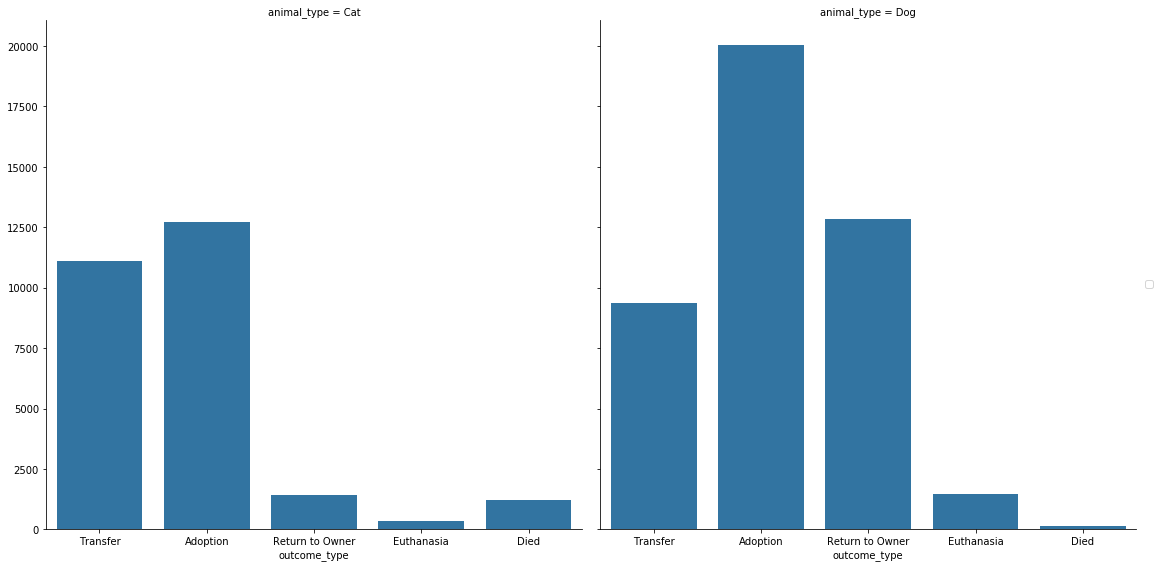

In [179]:
cat=data[data["animal_type"]=="Cat"]
dog=data[data["animal_type"]=="Dog"]
dog=dog.drop("animal_type",axis=1)
cat=cat.drop("animal_type",axis=1)
g = sns.FacetGrid(data, col="animal_type",size=8)
g.map(sns.countplot, "outcome_type")
g.add_legend();

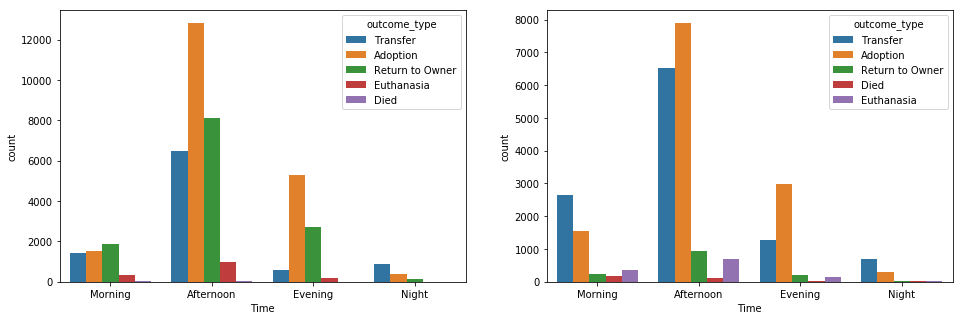

In [196]:
fig, axs = plt.subplots(figsize=(16,5),ncols=2)
sns.countplot(x="Time",hue="outcome_type",order=["Morning","Afternoon","Evening","Night"],data=dog_c,ax=axs[0])
sns.countplot(x="Time",hue="outcome_type",order=["Morning","Afternoon","Evening","Night"],data=cat_c,ax=axs[1])

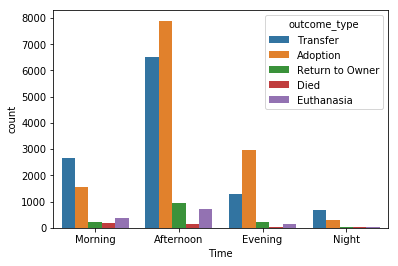

In [30]:

#cat_outcome=ohenc.fit_transform(cat_outcome.reshape(-1,1))
#dog_outcome=ohenc.fit_transform(dog_outcome.reshape(-1,1))


In [31]:
dog["tim"]=lenc.fit_transform(dog.Time).reshape(-1,1)
cat["tim"]=lenc.fit_transform(cat.Time).reshape(-1,1)


#hour_cat=ohenc.fit_transform(lenc.fit_transform(cat.Time).reshape(-1,1))
#hour_dog=ohenc.fit_transform(lenc.fit_transform(dog.Time).reshape(-1,1))

In [32]:
dog=dog.drop(["sex","IsSpayed","Time"],axis=1)

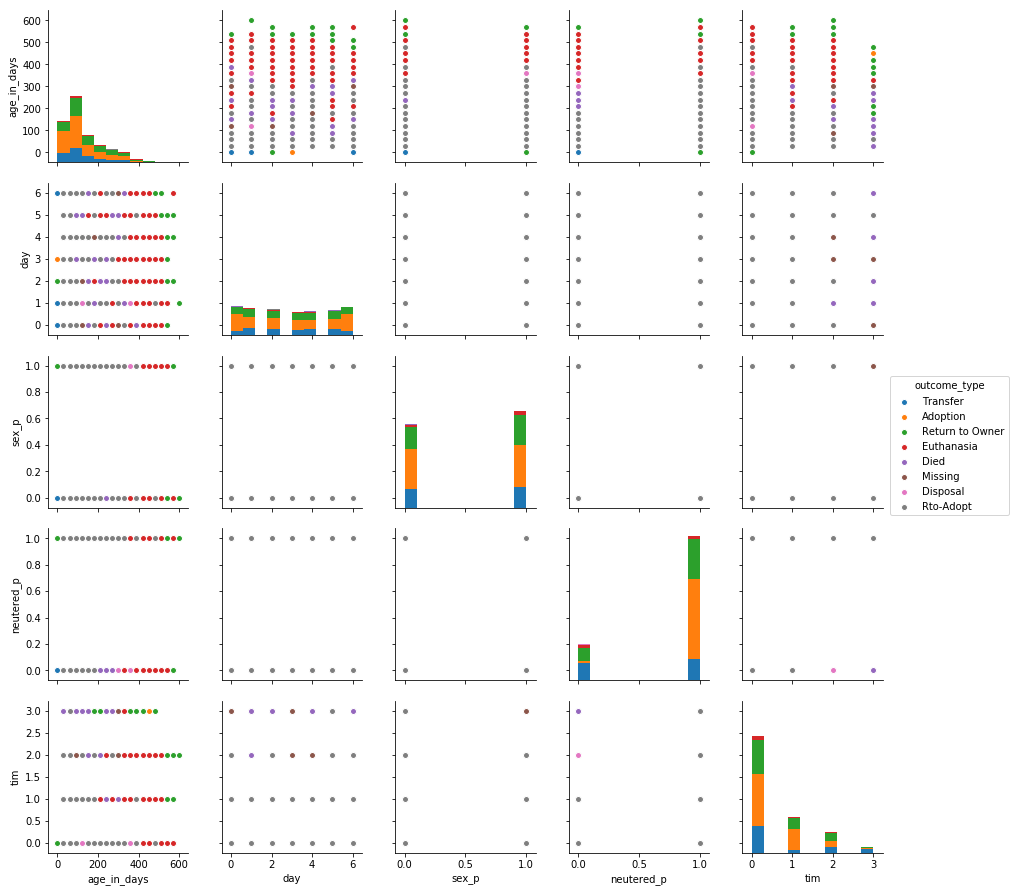

In [33]:
#day_cat=ohenc.fit_transform(cat.day.reshape(-1,1))
#day_dog=ohenc.fit_transform(dog.day.reshape(-1,1))

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [35]:
dog.head()

,outcome_type,age_in_days,day,sex_p,neutered_p,tim
1,Transfer,30,4,0,1,2
2,Adoption,30,2,1,1,0
3,Transfer,270,0,1,1,0
5,Transfer,120,1,1,0,0
7,Transfer,90,1,0,1,0


In [36]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

In [68]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [69]:
data.keys()

Index(['animal_type', 'outcome_type', 'age_in_days', 'day', 'sex', 'IsSpayed',
       'Time', 'sex_p', 'neutered_p'],
      dtype='object')

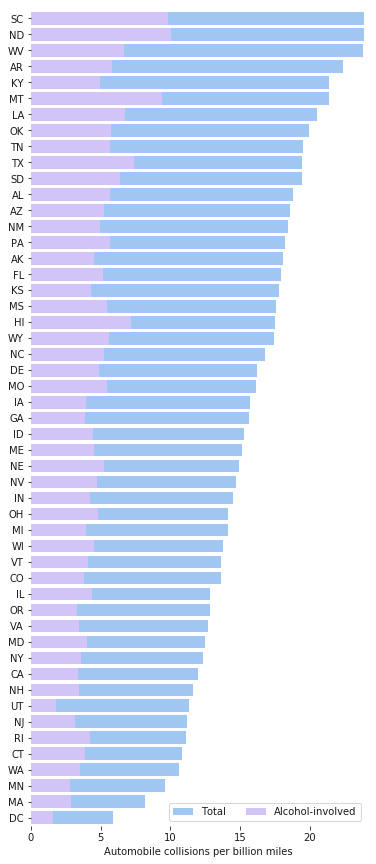

In [63]:


colors=["b","y","r","g","m","brown","grey"]

def plot_freq(a):
    
    f, ax = plt.subplots(figsize=(6, 15))
    sns.set_color_codes("pastel")

sns.barplot(x="total", y="abbrev", data=crashes,label="Total", color="b")

#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="y")

#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="r")

#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="g")

#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="m")

#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="brown")

#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="grey")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [48]:
sns.color_palette("Set1", n_colors=8, desat=.5)

[(0.696078431372549, 0.30000000000000004, 0.30392156862745096),
 (0.34215686274509804, 0.4813725490196079, 0.5950980392156863),
 (0.3950980392156863, 0.5872549019607843, 0.38921568627450986),
 (0.5343137254901962, 0.38921568627450975, 0.5558823529411765),
 (0.75, 0.49901960784313726, 0.25),
 (0.8, 0.8, 0.3999999999999999),
 (0.5274509803921569, 0.37058823529411766, 0.2803921568627451),
 (0.8529411764705883, 0.6215686274509804, 0.7431372549019608)]

In [34]:
final_dog=np.array(dog[["age_in_days"]])
final_cat=np.array(cat[["age_in_days"]])

In [35]:
final_cat=np.append(final_cat,day_cat.todense(),axis=1)
final_cat=np.append(final_cat,hour_cat.todense(),axis=1)
final_cat=np.append(final_cat,np.array(cat[["sex_p","neutered_p"]]),axis=1)
final_dog=np.append(final_dog,day_dog.todense(),axis=1)
final_dog=np.append(final_dog,hour_dog.todense(),axis=1)
final_dog=np.append(final_dog,np.array(dog[["sex_p","neutered_p"]]),axis=1)

In [36]:
final_dog.shape

(43998, 14)

In [37]:
final_cat.shape

(26890, 14)

In [38]:
cat_outcome.todense().shape

(26890, 8)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=50)
clf.fit(final_dog,dog_outcome.todense())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
predictions=clf.predict(final_dog)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,dog_outcome)

0.4460202736488022

In [42]:
hour[1].todense()

NameError: name 'hour' is not defined

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
   # KNeighborsClassifier(3),
   # SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
for i in classifiers:
    i.fit(final_dog,dog_outcome.todense())
    predictions=i.predict(final_dog)
    print(i,accuracy_score(predictions,dog_outcome))

ValueError: bad input shape (43998, 8)

In [ ]:
predictions[1:10]

In [53]:
X_tf=tf.placeholder(tf.float32,[None,14])
y_tf=tf.placeholder(tf.float32,[None,8])
W=tf.Variable(tf.zeros([14,8]))
b=tf.Variable(tf.zeros([8]))
import tensorflow as tf
l1_nodes=1000
l2_nodes=1000
l3_nodes=1000
hidden_layer_1={'weights':tf.Variable(tf.random_normal([14,l1_nodes])),'bias':tf.Variable(tf.random_normal([l1_nodes]))}
hidden_layer_2={'weights':tf.Variable(tf.random_normal([l1_nodes,l2_nodes])),'bias':tf.Variable(tf.random_normal([l2_nodes]))}
hidden_layer_3={'weights':tf.Variable(tf.random_normal([l2_nodes,l3_nodes])),'bias':tf.Variable(tf.random_normal([l3_nodes]))}
output_layer={'weights':tf.Variable(tf.random_normal([l3_nodes,8])),'bias':tf.Variable(tf.random_normal([8]))}
#values computer by each layer::  Weight*x+bias
l1=tf.add(tf.matmul(X_tf,hidden_layer_1['weights']),hidden_layer_1['bias'])
#we are using relu as the activation layer
#activation function of a node defines the output of that node
l1=tf.nn.relu(l1)
l2=tf.add(tf.matmul(l1,hidden_layer_2['weights']),hidden_layer_2['bias'])
l2=tf.nn.relu(l2)
l3=tf.add(tf.matmul(l2,hidden_layer_3['weights']),hidden_layer_3['bias'])
l3=tf.nn.relu(l3)
output=tf.add(tf.matmul(l1,output_layer['weights']),output_layer['bias'])
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=y_tf))
y_=tf.nn.softmax(output)
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
#optimizer=tf.train.GradientDescentOptimizer(0.001).minimize(cost)
optimizer=tf.train.AdamOptimizer().minimize(cost)
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
x=0
for _ in range(100):
    x=x+1000
    if(x>=40000):
        x=0
    sess.run(optimizer, feed_dict={X_tf: np.array(final_dog)[x:x+1000], y_tf: np.array(dog_outcome.todense())[x:x+1000]})
    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={X_tf: final_dog, y_tf: np.array(dog_outcome.todense())}))
correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={X_tf: final_dog, y_tf: np.array(dog_outcome.todense())}))



0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.00059093593
0.0011818719
0.007363971
0.02213737
0.06623028
0.120823674
0.18912223
0.19148597
0.24671575
0.2774899
0.28162643
0.32469657
0.40735942
0.42520115
0.44095185
0.44236103
0.44254285
0.43901995
0.42108732
0.41331425
0.39219964
0.31528705
0.27683076
0.25610256
0.231806
0.23141961
0.24446566
0.29449067
0.36040273
0.3875858
0.4079049
0.40801856
0.41288242
0.39451793
0.3647893
0.34290195
0.3069685
0.27803537
0.30028638
0.3476749
0.3848584
0.4027683
0.40029094
0.4005182
0.40947315
0.40135914
0.39435884
0.36978954
0.3384472
0.3235829
0.33478794
0.3129233
0.3186963
0.3696986
0.40904132
0.41338244
0.3952907
0.38344926
0.35862994
0.361971
0.38185826
0.40201828
0.41483703
0.41749626
0.40140462
0.38533568
0.3664712
0.35887995
0.38054
0.40170008
0.40631393
0.38076732
0.33142415
0.33399245
0.34501567
0.35812992
0.39565435
0.42404202
0.43658802
0.40385

In [ ]:
import tensorflow as tf
X_tf=tf.placeholder(tf.float32,[None,14])
y_tf=tf.placeholder(tf.float32,[None,8])
W=tf.Variable(tf.zeros([14,8]))
b=tf.Variable(tf.zeros([8]))
y_=tf.nn.softmax(tf.matmul(X_tf,W)+b)
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
x=0
for _ in range(1000):
    x=x+100
    if(x>=40000):
        x=0
    sess.run(train_step, feed_dict={X_tf: np.array(final_dog)[x:x+100], y_tf: np.array(dog_outcome.todense())[x:x+100]})
    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={X_tf: final_dog, y_tf: np.array(dog_outcome.todense())}))

0.29176328
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748
0.455748

In [35]:
np.array(final_dog)[1:10]

array([[ 30.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.],
       [270.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.],
       [120.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.],
       [ 90.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.],
       [ 60.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.],
       [ 60.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.],
       [120.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.],
       [240.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.],
       [ 60.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.]])

In [184]:
print(np.array(clf.predict_proba(final_dog[0])).shape)

(8, 1, 2)


In [179]:
dog_outcome.todense().shape

(43998, 8)

In [59]:
x=sns.load_dataset("iris")

In [61]:
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
